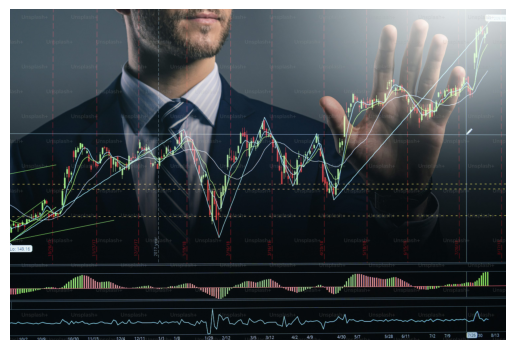

In [1]:
## (A modern) Time Series tutorial
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
img = mpimg.imread('C:/Users/hp/Downloads/stock image.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

#**Time Series** is a class of data science problems where the primary values of interest are a series of data points measured over a period of time. This notebook aims to provide the basic building blocks of some of the **more modern algorithms / techniques (and data!)** for solving these types of problems.

In [2]:
# Importing required modules
import pandas as pd          
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # For plotting graphs 
import datetime as dt
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline 

import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

In [3]:
import pandas as pd
df = pd.read_csv("C:/Users/hp/Downloads/ADANIPORTS.csv")
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
# For the sake of this notebook, I shall limit the number of columns to keep things simple. 

data = df[['Date','Open','High','Low','Close','Volume','VWAP']]


In [5]:
## Datetime objects in Python
# Let us now look at the datatypes of the various components.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 2007-11-27 to 2020-10-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3200 non-null   object 
 1   Open    3200 non-null   float64
 2   High    3200 non-null   float64
 3   Low     3200 non-null   float64
 4   Close   3200 non-null   float64
 5   Volume  3200 non-null   int64  
 6   VWAP    3200 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 200.0+ KB


In [7]:
# It appears that the Date column is being treated as a string rather than as dates. To fix this, we’ll use the pandas to_datetime() feature which converts the arguments to dates.

In [8]:
# Convert string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2007-11-27,770.00,1050.00,770.0,962.90,27294366,984.72
2007-11-28,984.00,990.00,874.0,893.90,4581338,941.38
2007-11-29,909.00,914.75,841.0,884.20,5124121,888.09
2007-11-30,890.00,958.00,890.0,921.55,4609762,929.17
2007-12-03,939.75,995.00,922.0,969.30,2977470,965.65


In [9]:
### About the Stock Data
# Now that our data has been converted into the desired format, let’s look at its various columns for further analysis.

# The Open and Close columns indicate the opening and closing price of the stocks on a particular day.
# The High and Low columns provide the stock's highest and lowest price on a particular day, respectively.
# The Volume column tells us the total volume of stocks traded on a particular day.
# The volume-weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security

In [10]:
# Visualising Data

Text(0, 0.5, 'VWAP')

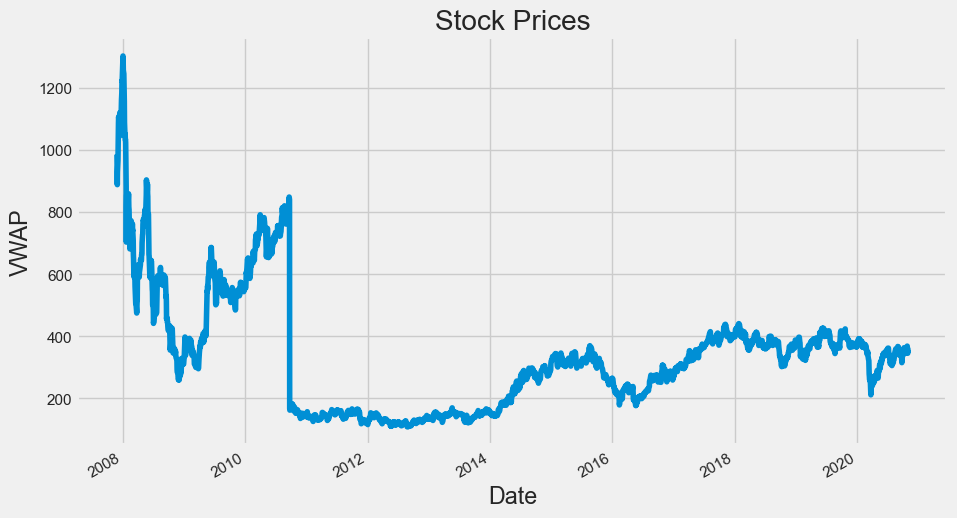

In [11]:
data['VWAP'].plot(figsize=(10,6),title='Stock Prices')
plt.ylabel('VWAP')

In [12]:
# Manipulating TimeSeries dataset
#As pandas was developed in the context of financial modeling, it contains a comprehensive set of tools for working with dates, times, and time-indexed data. Let’s look at the main pandas data structures for working with time series data.

# Manipulating Datetime
# Python's basic objects for working with dates and times reside in the built-in datetime module. In pandas, a single point in time is represented as a Timestamp and we can use datetime() function to create Timestamps from strings in a wide variety of date/time formats.

In [13]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [14]:
# We can now create a datetime object, and use it freely with pandas given the above attributes.

In [15]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2019, 4, 21, 0, 0)

In [16]:
# For the purposes of analyzing our particular data, we have selected only the day, month and year, but we could also include more details like hour, minute and second if necessary. 

In [17]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [18]:
# For our stock price dataset, the type of the index column is DatetimeIndex. We can use pandas to obtain the minimum and maximum dates in the data.

In [19]:
print(data.index.max())
print(data.index.min())

2020-10-30 00:00:00
2007-11-27 00:00:00


In [20]:
# We can also calculate the latest date location and the earliest date index location as follows:

In [21]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())


Earliest date index location is:  0
Latest date location:  3199


In [22]:
# Subsetting Data Using Pandas Dataframes
# Instead of working with the entire data, it is also possible to slice the Time Series data to highlight the portion of the data we are interested in. Since the volume weighted average price (VWAP) is a trading benchmark, we shall limit our analysis to only that column.

In [23]:
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index("Date", inplace = True)
df_vwap.head()

,VWAP
Date,
2007-11-27,984.72
2007-11-28,941.38
2007-11-29,888.09
2007-11-30,929.17
2007-12-03,965.65


In [24]:
# Slicing on year
vwap_subset = df_vwap['2017':'2020']

# Slicing on month
vwap_subset = df_vwap['2017-01':'2020-12']

#Slicing on day
vwap_subset = df_vwap['2017-01-01':'2020-12-15']

In [25]:
#Visualizing the volume weighted average price (VWAP)
#When working with time-series data, a lot can be revealed through visualizing it.

#Visualizing using markers
#It is possible to add markers in the plot to help emphasize the specific observations or specific events in the time series.

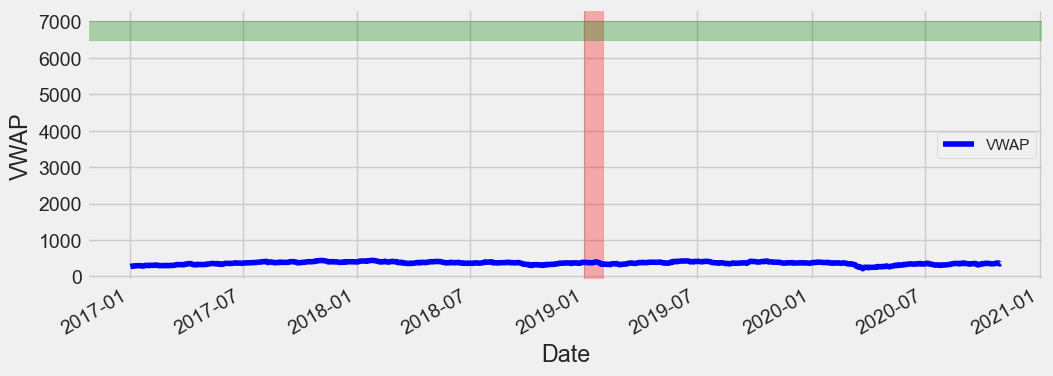

In [26]:
ax = vwap_subset.plot(color='blue',fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('VWAP')

ax.axvspan('2019-01-01','2019-01-31', color='red', alpha=0.3)
ax.axhspan(6500,7000, color='green',alpha=0.3)

plt.show()

In [27]:
# Visualising using KDEs
# Summarizing the data with Density plots to see where the mass of the data is located

<Axes: xlabel='VWAP', ylabel='Density'>

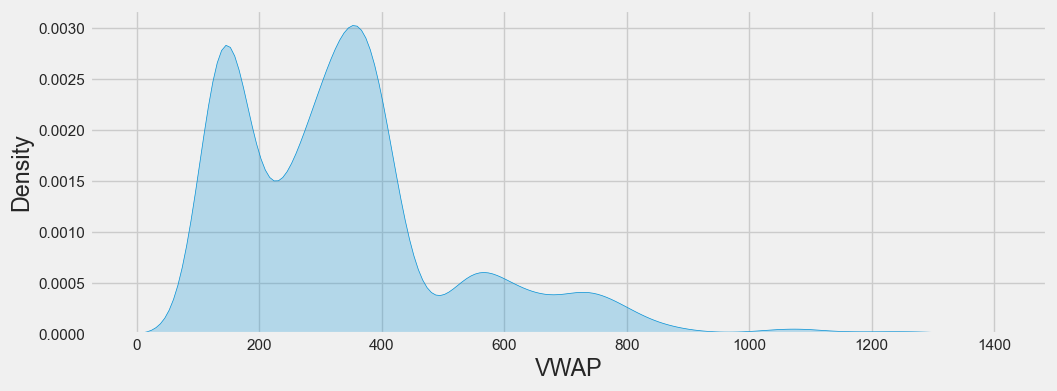

In [28]:
sns.kdeplot(df_vwap['VWAP'],shade=True)

In [29]:
# Visualising using Lineplots

<Axes: title={'center': ' volume weighted average price'}, xlabel='Date'>

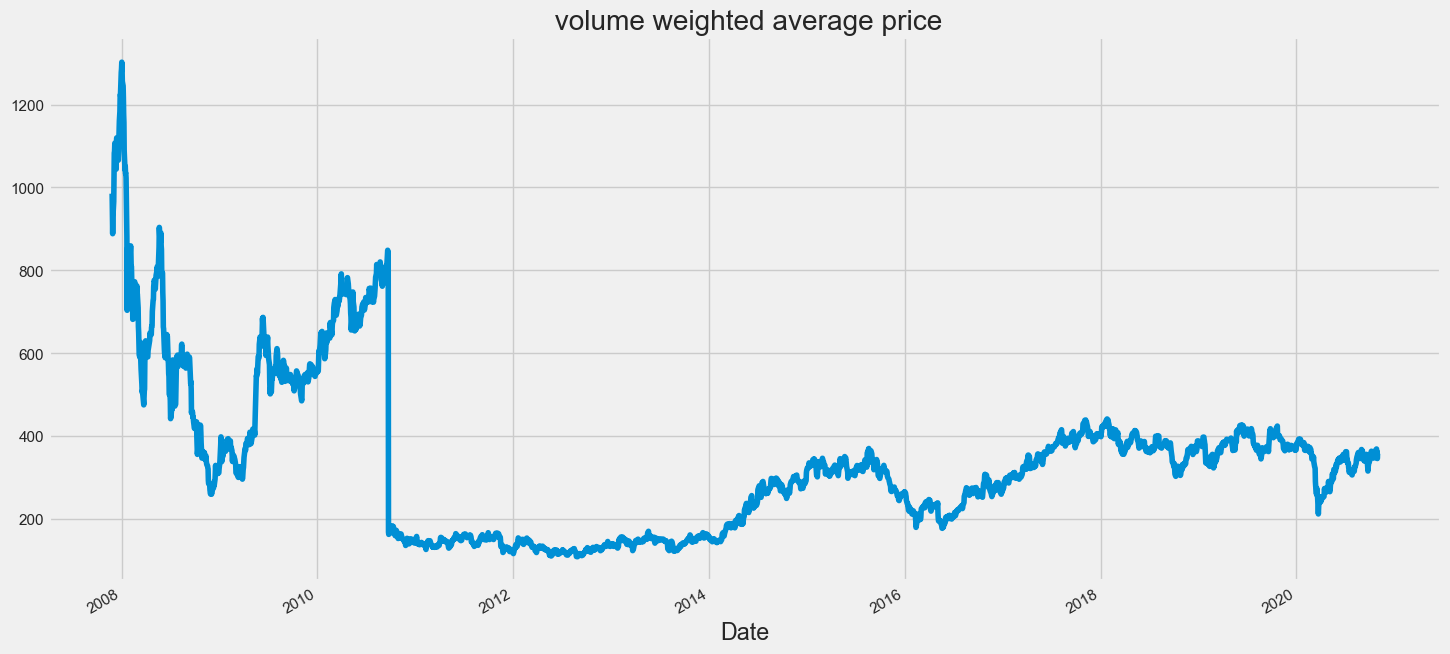

In [30]:
# Visualising the VWAP 
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')

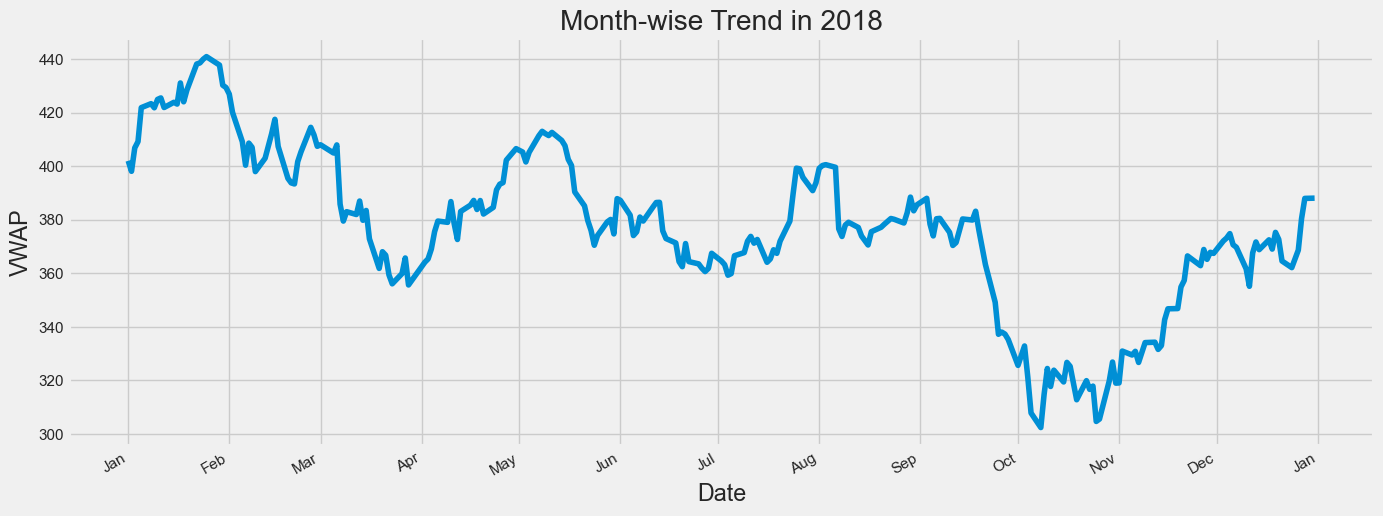

In [31]:
ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2018'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

In [32]:
# We see that there was a dip in the stock prices particularly around end of October and November. Let's zoom in on these dates

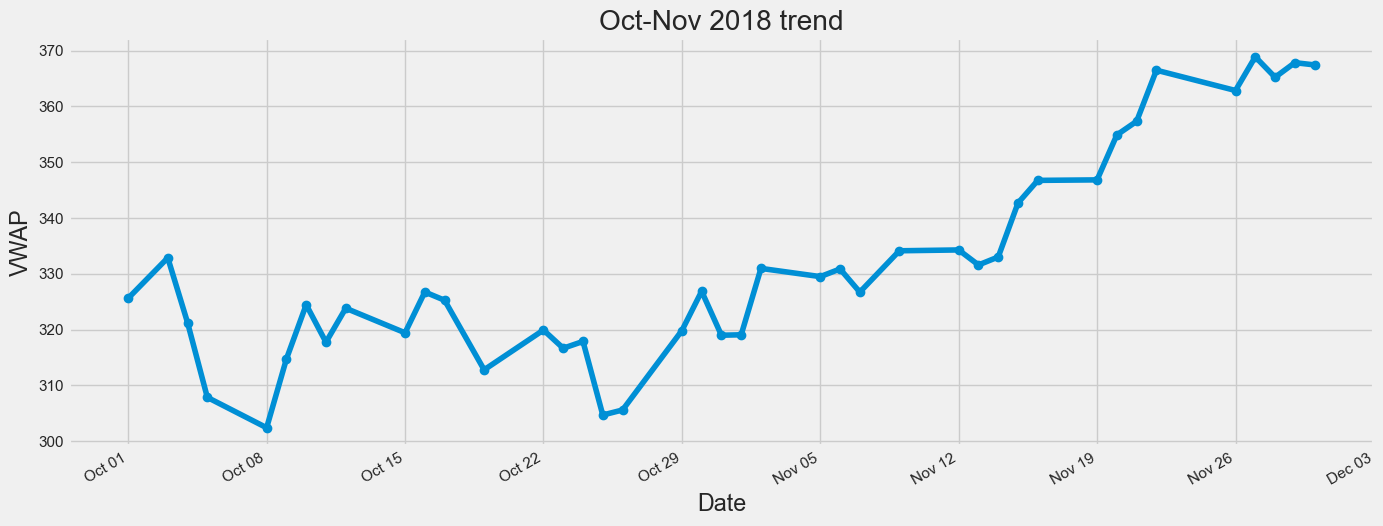

In [33]:
ax = df_vwap.loc['2018-10':'2018-11','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Oct-Nov 2018 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [34]:
# So there is a dip in stock prices around the last week of october and first week of November. One could investigate it further by finding out if there was some special event that occured on that day

In [35]:
# Time-series seasonal decomposition

# As mentioned in the earlier section, we can decompose a time series into trend, seasonal, and remainder components. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index, and residual.

#The seasonal_decompose in stats models is used to implement the decomposition.

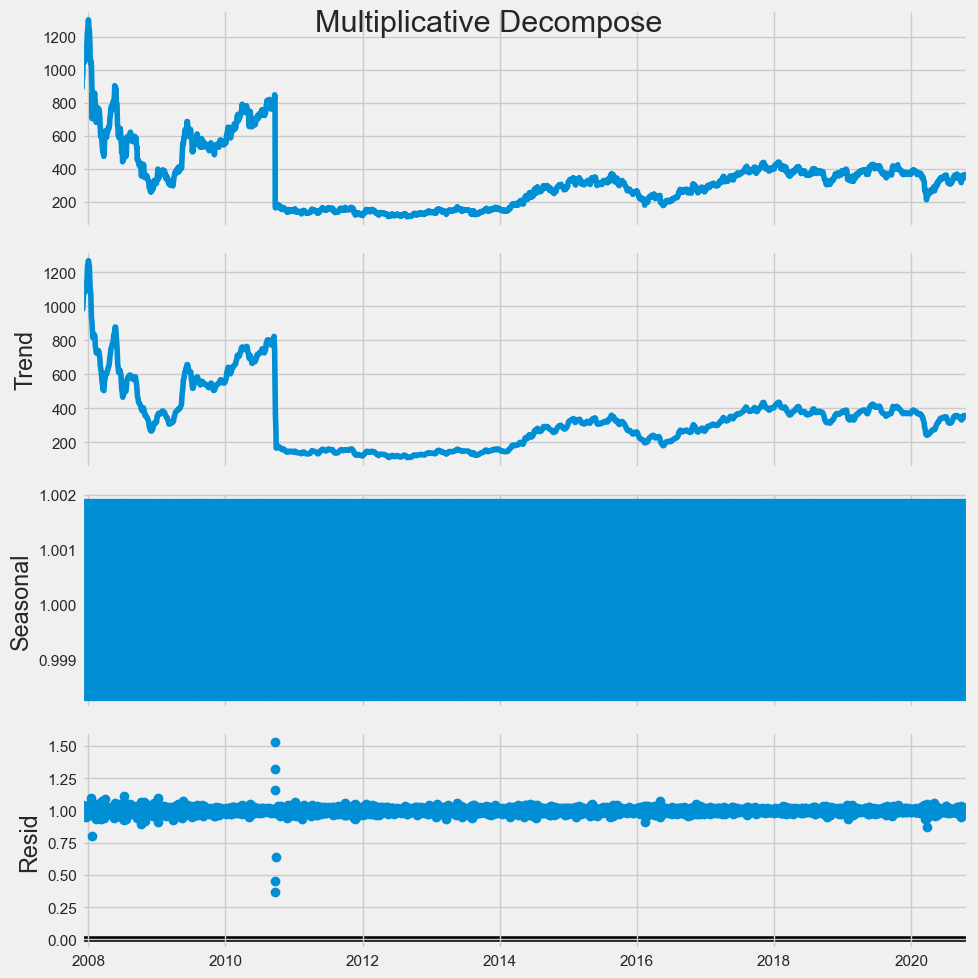

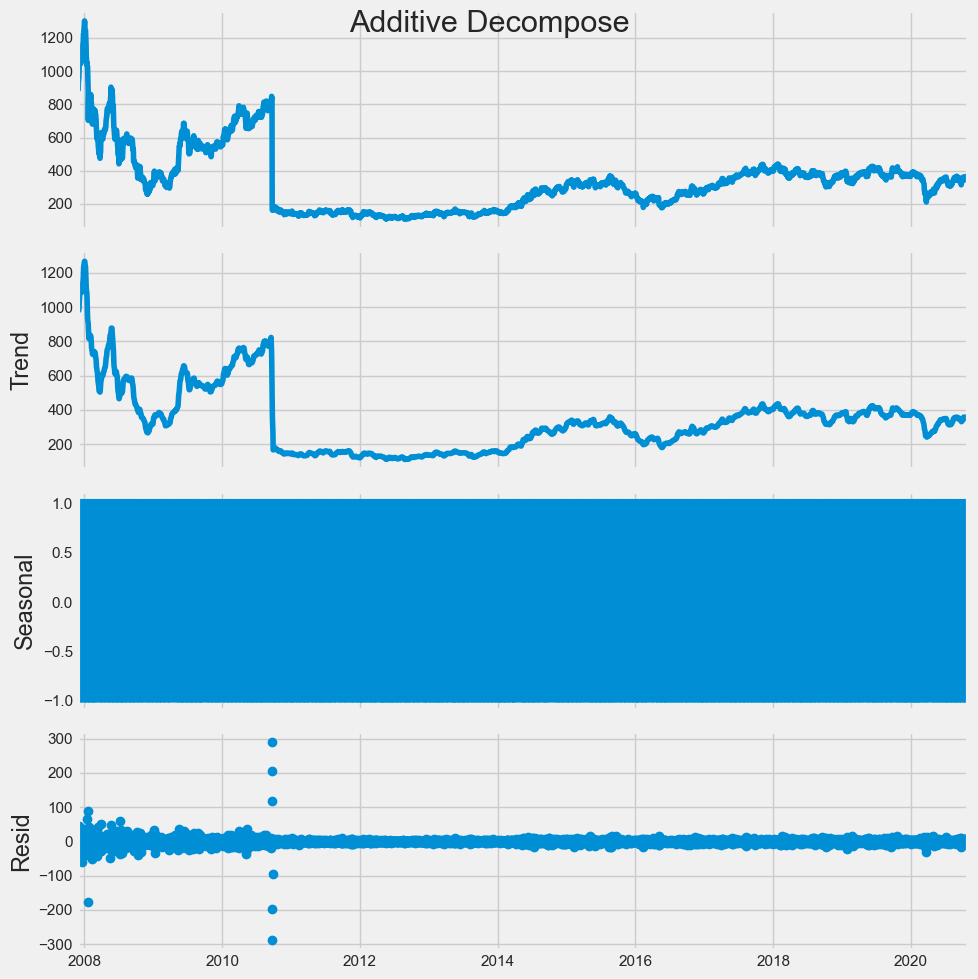

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = df_vwap['VWAP'].to_frame()

# Assuming a daily seasonality (change this based on your actual data)
period = 7  # Daily seasonality (change if monthly, weekly, etc.)

# Multiplicative Decomposition
result_mul = seasonal_decompose(y, model='multiplicative', period=period)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive', period=period)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})

result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)

plt.show()

In [37]:
## Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.tail()

,seas,trend,resid,actual_values
Date,,,,
2020-10-26,-0.990935,359.318571,10.082364,368.41
2020-10-27,-0.192005,359.521429,-1.189424,358.14
2020-10-28,0.374119,NaN,NaN,361.96
2020-10-29,0.730776,NaN,NaN,345.39
2020-10-30,1.019018,NaN,NaN,357.09


In [38]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek



#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,984.72,2007,11,27,1
2007-11-28,941.38,2007,11,28,2
2007-11-29,888.09,2007,11,29,3
2007-11-30,929.17,2007,11,30,4
2007-12-03,965.65,2007,12,3,0


Text(0.5, 1.0, 'Yearly Mean VWAP for stocks')

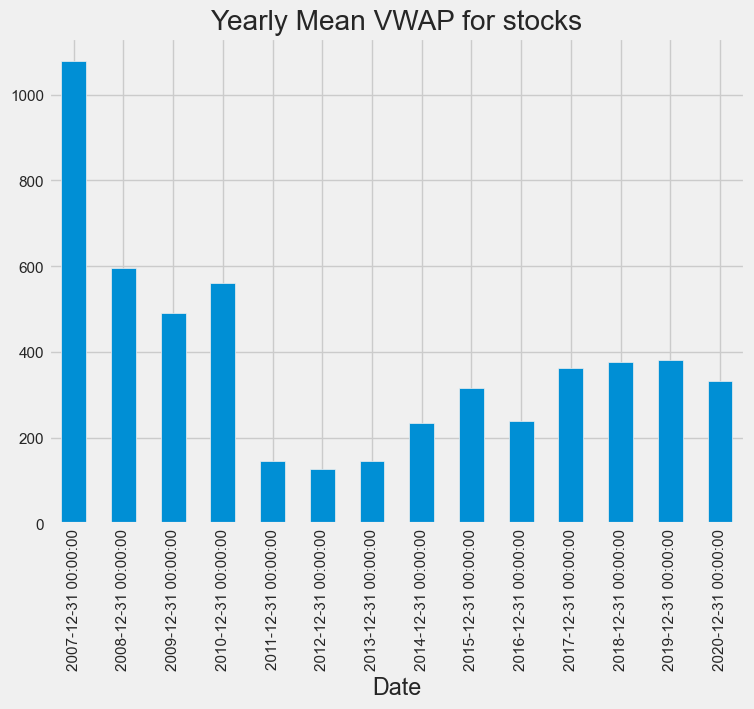

In [39]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for stocks')


Text(0.5, 1.0, 'Yearly start Mean VWAP for stocks')

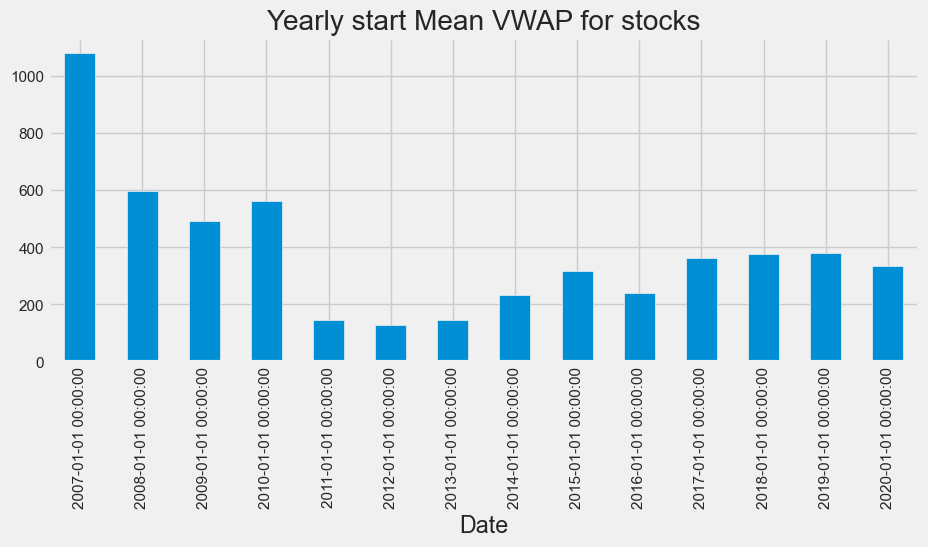

In [40]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for stocks')


In [41]:
#Time Shifting
#Sometimes, we may need to shift or move the data forward or backwards in time. This shifting is done along a time index by the desired number of time-frequency increments.Here is the original dataset before any time shifts

In [42]:
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,984.72,2007,11,27,1
2007-11-28,941.38,2007,11,28,2
2007-11-29,888.09,2007,11,29,3
2007-11-30,929.17,2007,11,30,4
2007-12-03,965.65,2007,12,3,0


In [43]:
#Forward Shifting
#To shift our data forward, we will pass the desired number of periods (or increments) through the shift() function, which needs to be positive value in this case. Let's move our data forward by one period or index, which means that all values which earlier corresponded to row N will now belong to row N+1. Here is the output:

In [44]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,NaN,NaN,NaN,NaN,NaN
2007-11-28,984.72,2007.0,11.0,27.0,1.0
2007-11-29,941.38,2007.0,11.0,28.0,2.0
2007-11-30,888.09,2007.0,11.0,29.0,3.0
2007-12-03,929.17,2007.0,11.0,30.0,4.0


In [45]:
#Backwards Shifting
#To shift our data backward, the number of periods (or increments) must be negative

In [46]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,941.38,2007.0,11.0,28.0,2.0
2007-11-28,888.09,2007.0,11.0,29.0,3.0
2007-11-29,929.17,2007.0,11.0,30.0,4.0
2007-11-30,965.65,2007.0,12.0,3.0,0.0
2007-12-03,1015.39,2007.0,12.0,4.0,1.0


In [47]:
#Rolling windows
#Time series data can be noisy due to high fluctuations in the market. As a result, it becomes difficult to gauge a trend or pattern in the data. Here is a visualization of the Amazon’s adjusted close price over the years where we can see such noise:

<Axes: xlabel='Date'>

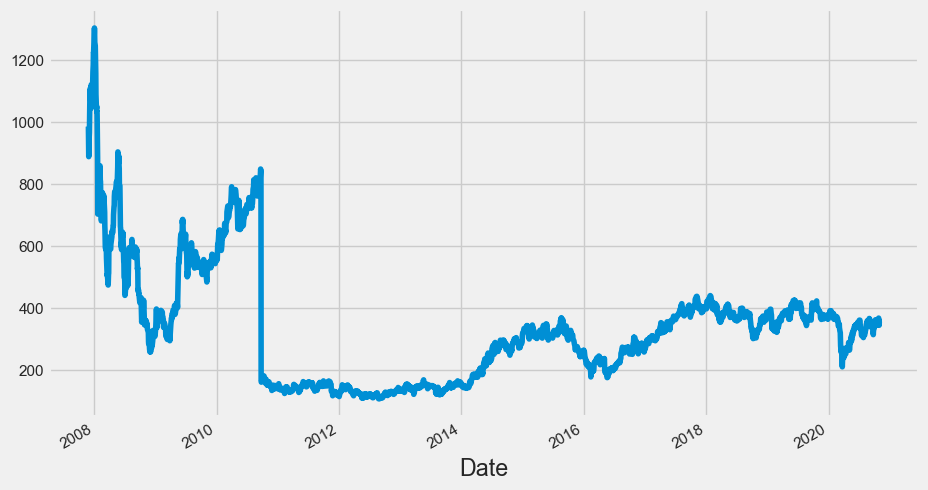

In [48]:
df_vwap['VWAP'].plot(figsize = (10,6)

In [49]:
#As we’re looking at daily data, there’s quite a bit of noise present. It would be nice if we could average this out by a week, which is where a rolling mean comes in. A rolling mean, or moving average, is a transformation method which helps average out noise from data. It works by simply splitting and aggregating the data into windows according to function, such as mean(), median(), count(), etc. For this example, we’ll use a rolling mean for 7 days.

In [50]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2007-11-27,NaN,NaN,NaN,NaN,NaN
2007-11-28,NaN,NaN,NaN,NaN,NaN
2007-11-29,NaN,NaN,NaN,NaN,NaN
2007-11-30,NaN,NaN,NaN,NaN,NaN
2007-12-03,NaN,NaN,NaN,NaN,NaN
2007-12-04,NaN,NaN,NaN,NaN,NaN
2007-12-05,972.455714,2007.0,11.428571,18.000000,1.857143
2007-12-06,987.071429,2007.0,11.571429,15.000000,2.142857
2007-12-07,1010.670000,2007.0,11.714286,12.000000,2.428571


In [51]:
#The first six values have all become blank as there wasn’t enough data to actually fill them when using a window of seven days.

#So, what are the key benefits of calculating a moving average or using this rolling mean method? Our data becomes a lot less noisy and more reflective of the trend than the data itself. Let’s actually plot this out. First, we’ll plot the original data followed by the rolling data for 30 days.

<Axes: xlabel='Date'>

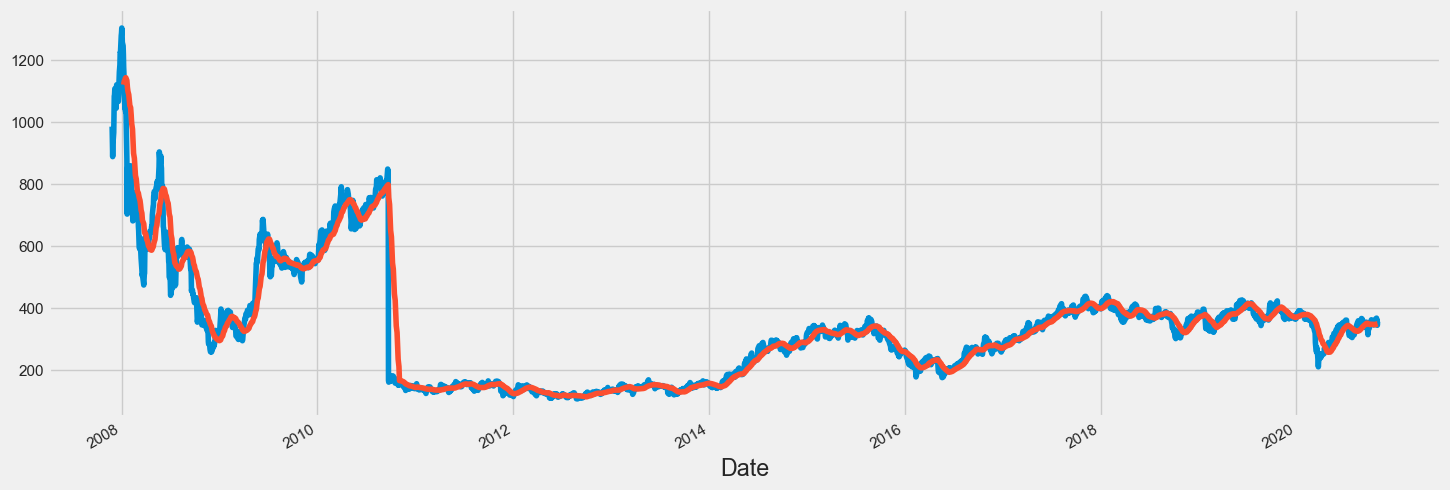

In [52]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

In [53]:
#The blue line is the original open price data. The red line represents the 30-day rolling window, and has less noise than the orange line. Something to keep in mind is that once we run this code, the first 29 days aren’t going to have the blue line because there wasn’t enough data to actually calculate that rolling mean.

In [54]:
#Handling Missing Values in Time-series Data
#Real world data is messy and often contains missing values. it is not uncommon for time-series data to contain missing values.

In [55]:
#Checking for missing values
df_vwap.isnull().sum()

VWAP           0
year           0
month          0
day            0
day of week    0
dtype: int64

In [56]:
#Our current data doesn't have any missing values but then this doesn't reflect so of the scenarios we might face in real life. I have created an extensive notebook that goes deeper into handling missing values in both Time series and non Time series problems.